In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [7]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [9]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
df

loan_amnt        term  int_rate  installment grade sub_grade  \
0         10000.0   36 months     11.44       329.48     B        B4   
1          8000.0   36 months     11.99       265.68     B        B5   
2         15600.0   36 months     10.49       506.97     B        B3   
3          7200.0   36 months      6.49       220.65     A        A2   
4         24375.0   60 months     17.27       609.33     C        C5   
...           ...         ...       ...          ...   ...       ...   
396025    10000.0   60 months     10.99       217.38     B        B4   
396026    21000.0   36 months     12.29       700.42     C        C1   
396027     5000.0   36 months      9.99       161.32     B        B1   
396028    21000.0   60 months     15.31       503.02     C        C2   
396029     2000.0   36 months     13.61        67.98     C        C2   

                       emp_title emp_length home_ownership  annual_inc  \
0                      Marketing  10+ years           RENT    117000.0   
1                Credit analyst     4 years       MORTGAGE     65000.0   
2                   Statistician   < 1 year           RENT     43057.0   
3                Client Advocate    6 years           RENT     54000.0   
4        Destiny Management Inc.    9 years       MORTGAGE     55000.0   
...                          ...        ...            ...         ...   
396025          licensed bankere    2 years           RENT     40000.0   
396026                     Agent    5 years       MORTGAGE    110000.0   
396027              City Carrier  10+ years           RENT     56500.0   
396028      Gracon Services, Inc  10+ years       MORTGAGE     64000.0   
396029  Internal Revenue Service  10+ years           RENT     42996.0   

       verification_status   issue_d  loan_status             purpose  \
0             Not Verified  Jan-2015   Fully Paid            vacation   
1             Not Verified  Jan-2015   Fully Paid  debt_consolidation   
2          Source Verified  Jan-2015   Fully Paid         credit_card   
3             Not Verified  Nov-2014   Fully Paid         credit_card   
4                 Verified  Apr-2013  Charged Off         credit_card   
...                    ...       ...          ...                 ...   
396025     Source Verified  Oct-2015   Fully Paid  debt_consolidation   
396026     Source Verified  Feb-2015   Fully Paid  debt_consolidation   
396027            Verified  Oct-2013   Fully Paid  debt_consolidation   
396028            Verified  Aug-2012   Fully Paid  debt_consolidation   
396029            Verified  Jun-2010   Fully Paid  debt_consolidation   

                          title    dti earliest_cr_line  open_acc  pub_rec  \
0                      Vacation  26.24         Jun-1990      16.0      0.0   
1            Debt consolidation  22.05         Jul-2004      17.0      0.0   
2       Credit card refinancing  12.79         Aug-2007      13.0      0.0   
3       Credit card refinancing   2.60         Sep-2006       6.0      0.0   
4         Credit Card Refinance  33.95         Mar-1999      13.0      0.0   
...                         ...    ...              ...       ...      ...   
396025       Debt consolidation  15.63         Nov-2004       6.0      0.0   
396026       Debt consolidation  21.45         Feb-2006       6.0      0.0   
396027     pay off credit cards  17.56         Mar-1997      15.0      0.0   
396028            Loanforpayoff  15.88         Nov-1990       9.0      0.0   
396029        Toxic Debt Payoff   8.32         Sep-1998       3.0      0.0   

        revol_bal  revol_util  total_acc initial_list_status application_type  \
0         36369.0        41.8       25.0                   w       INDIVIDUAL   
1         20131.0        53.3       27.0                   f       INDIVIDUAL   
2         11987.0        92.2       26.0                   f       INDIVIDUAL   
3          5472.0        21.5       13.0                   f       INDIVIDUAL   
4         24584.0        69.8      

### Creating a counterplot

<Axes: xlabel='loan_status', ylabel='count'>

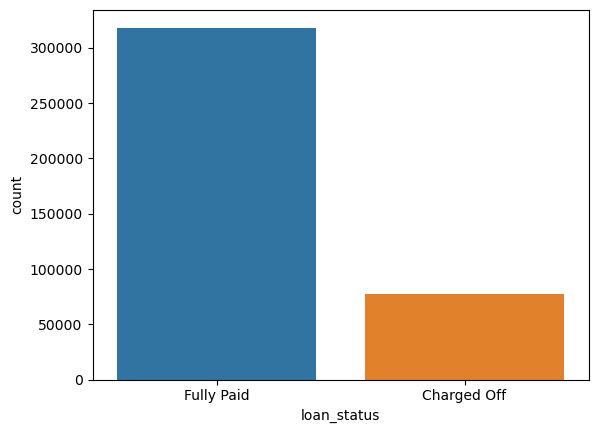

In [10]:
sns.countplot(x='loan_status',data=df)

### Creating a histplot

<Axes: xlabel='loan_amnt', ylabel='Count'>

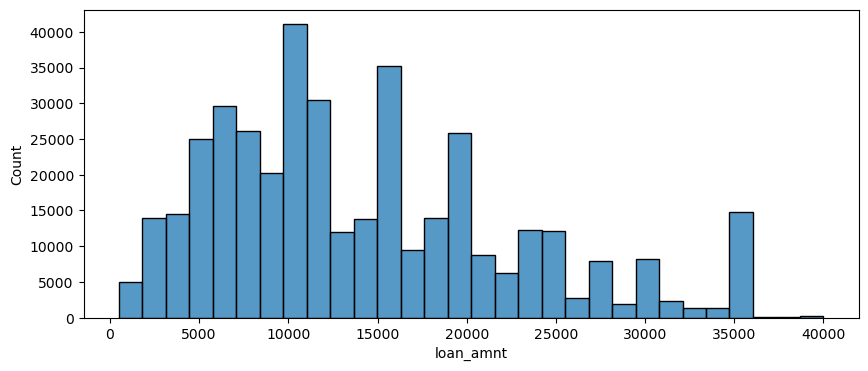

In [11]:
plt.figure(figsize=(10,4))
sns.histplot(x='loan_amnt',data=df,bins=30)

### exploring correlation between the continuous feature variables

In [12]:
df.corr(numeric_only=True)

loan_amnt  int_rate  installment  annual_inc       dti  \
loan_amnt              1.000000  0.168921     0.953929    0.336887  0.016636   
int_rate               0.168921  1.000000     0.162758   -0.056771  0.079038   
installment            0.953929  0.162758     1.000000    0.330381  0.015786   
annual_inc             0.336887 -0.056771     0.330381    1.000000 -0.081685   
dti                    0.016636  0.079038     0.015786   -0.081685  1.000000   
open_acc               0.198556  0.011649     0.188973    0.136150  0.136181   
pub_rec               -0.077779  0.060986    -0.067892   -0.013720 -0.017639   
revol_bal              0.328320 -0.011280     0.316455    0.299773  0.063571   
revol_util             0.099911  0.293659     0.123915    0.027871  0.088375   
total_acc              0.223886 -0.036404     0.202430    0.193023  0.102128   
mort_acc               0.222315 -0.082583     0.193694    0.236320 -0.025439   
pub_rec_bankruptcies  -0.106539  0.057450    -0.098628   -0.050162 -0.014558   

                      open_acc   pub_rec  revol_bal  revol_util  total_acc  \
loan_amnt             0.198556 -0.077779   0.328320    0.099911   0.223886   
int_rate              0.011649  0.060986  -0.011280    0.293659  -0.036404   
installment           0.188973 -0.067892   0.316455    0.123915   0.202430   
annual_inc            0.136150 -0.013720   0.299773    0.027871   0.193023   
dti                   0.136181 -0.017639   0.063571    0.088375   0.102128   
open_acc              1.000000 -0.018392   0.221192   -0.131420   0.680728   
pub_rec              -0.018392  1.000000  -0.101664   -0.075910   0.019723   
revol_bal             0.221192 -0.101664   1.000000    0.226346   0.191616   
revol_util           -0.131420 -0.075910   0.226346    1.000000  -0.104273   
total_acc             0.680728  0.019723   0.191616   -0.104273   1.000000   
mort_acc              0.109205  0.011552   0.194925    0.007514   0.381072   
pub_rec_bankruptcies -0.027732  0.699408  -0.124532   -0.086751   0.042035   

                      mort_acc  pub_rec_bankruptcies  
loan_amnt             0.222315             -0.106539  
int_rate             -0.082583              0.057450  
installment           0.193694             -0.098628  
annual_inc            0.236320             -0.050162  
dti                  -0.025439             -0.014558  
open_acc              0.109205             -0.027732  
pub_rec               0.011552              0.699408  
revol_bal             0.194925             -0.124532  
revol_util            0.007514             -0.086751  
total_acc             0.381072              0.042035  
mort_acc              1.000000              0.027239  
pub_rec_bankruptcies  0.027239              1.000000

### Using a heatmap

(10.0, 0.0)

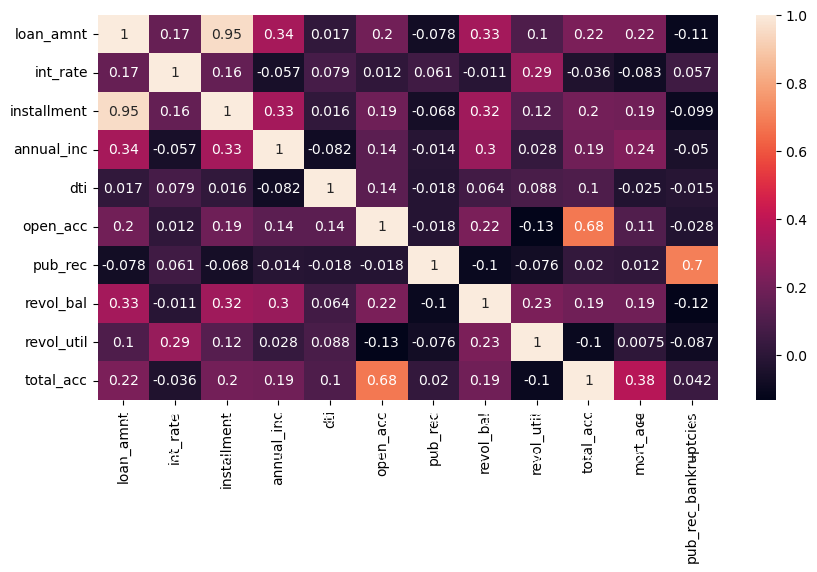

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.ylim(10,0)

### Print out their descriptions and perform a scatterplot between installment and loan_amnt

In [14]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [15]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

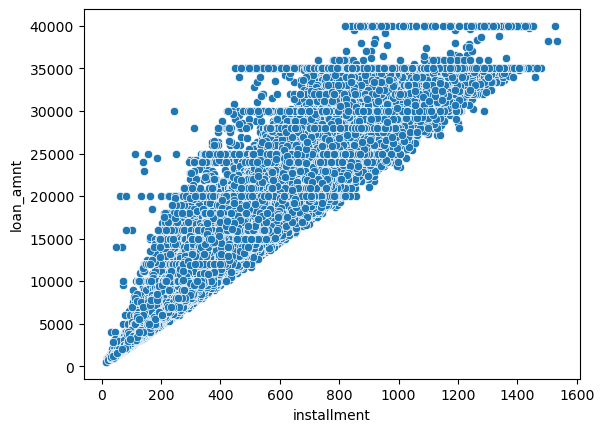

In [16]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

### Creating a boxplot 

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

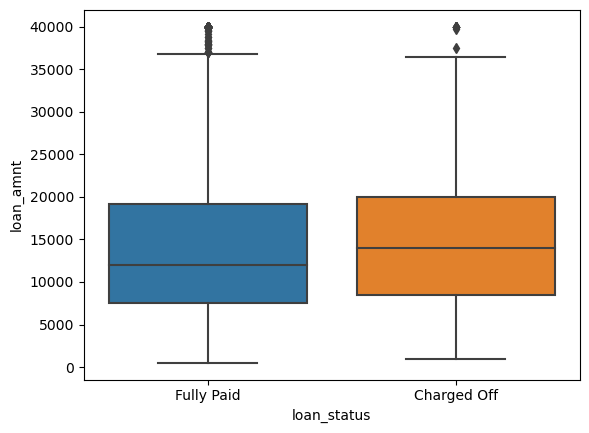

In [17]:
sns.boxplot(y='loan_amnt',x='loan_status',data=df)

### Calculating the summary statistics for the loan amount, grouped by the loan_status.

In [18]:
df.groupby('loan_status')['loan_amnt'].describe()

count          mean          std     min     25%      50%  \
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  20000.0  40000.0  
Fully Paid   19225.0  40000.0

### Exploring the Grade and SubGrade columns that LendingClub attributes to the loans

In [19]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [20]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

### Creating a countplot per grade

<Axes: xlabel='grade', ylabel='count'>

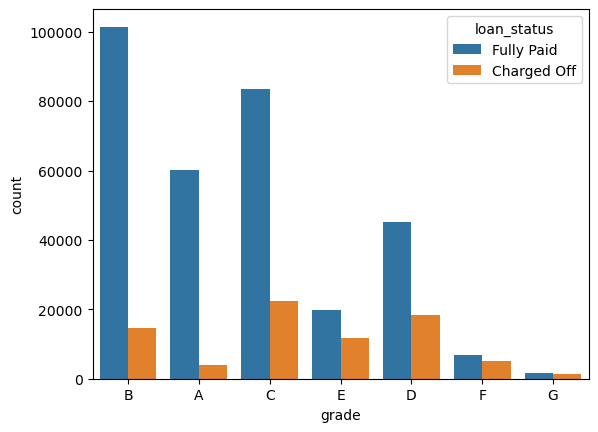

In [21]:
sns.countplot(x='grade',data=df,hue='loan_status')

### Creating a count plot per subgrade

<Axes: xlabel='sub_grade', ylabel='count'>

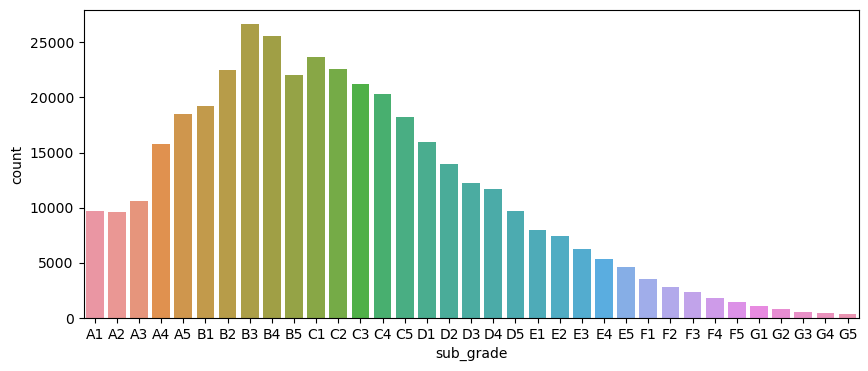

In [22]:
plt.figure(figsize=(10,4))
order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=order)

<Axes: xlabel='sub_grade', ylabel='count'>

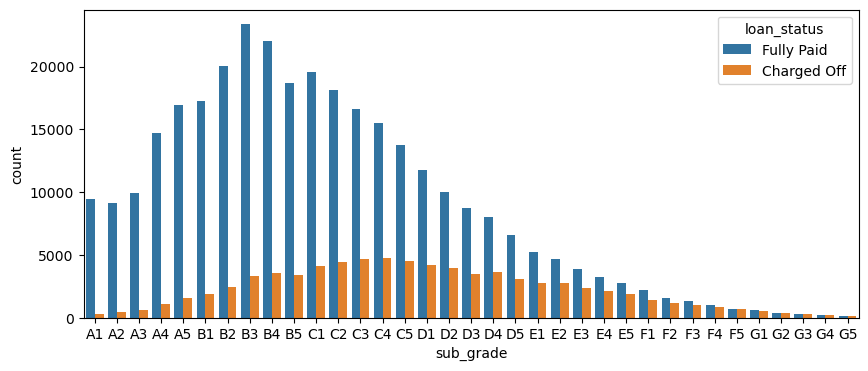

In [23]:
plt.figure(figsize=(10,4))
order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,hue='loan_status',order=order)

### Recreating the countplot just for subgrades

<Axes: xlabel='sub_grade', ylabel='count'>

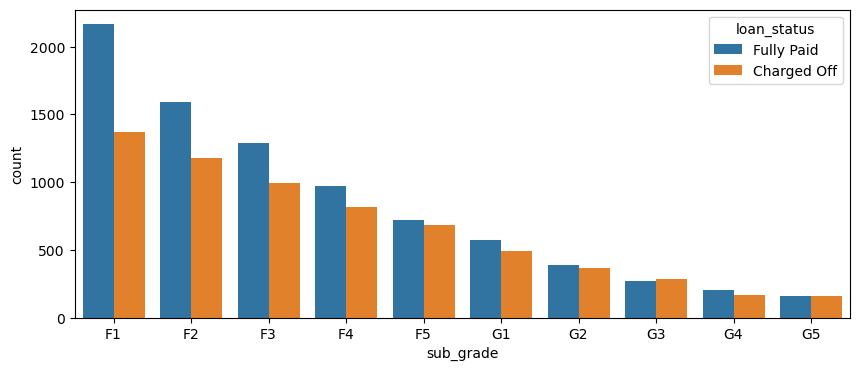

In [24]:
plt.figure(figsize=(10,4))

fg = df[(df['grade'] == 'G') | (df['grade'] == 'F')]

order = sorted(fg['sub_grade'].unique())

sns.countplot(x='sub_grade',data=fg,hue='loan_status',order=order)

### Creating a new dummie column

In [25]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

In [26]:
df[['loan_repaid','loan_status']]

loan_repaid  loan_status
0                 1   Fully Paid
1                 1   Fully Paid
2                 1   Fully Paid
3                 1   Fully Paid
4                 0  Charged Off
...             ...          ...
396025            1   Fully Paid
396026            1   Fully Paid
396027            1   Fully Paid
396028            1   Fully Paid
396029            1   Fully Paid

[396030 rows x 2 columns]

### Creating a bar plot showing the correlation of the numeric features to the new loan_repaid column

<Axes: >

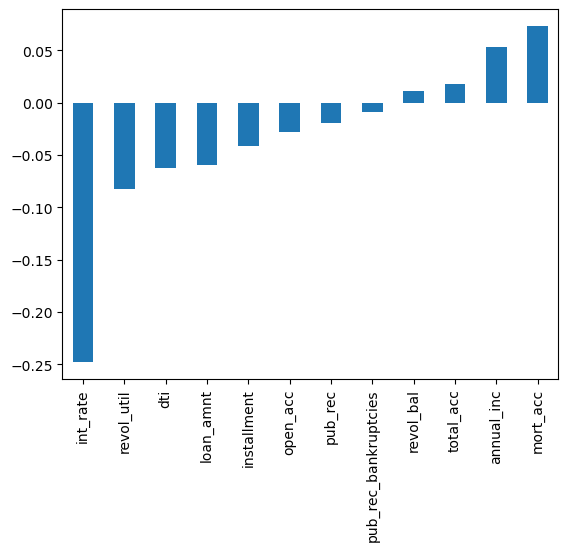

In [27]:
df.corr(numeric_only=True)['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar')

### Data PreProcessing

In [28]:
len(df)

396030

In [29]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [30]:
df.isnull().sum()/df.count()*100

loan_amnt                0.000000
term                     0.000000
int_rate                 0.000000
installment              0.000000
grade                    0.000000
sub_grade                0.000000
emp_title                6.144952
emp_length               4.845008
home_ownership           0.000000
annual_inc               0.000000
verification_status      0.000000
issue_d                  0.000000
loan_status              0.000000
purpose                  0.000000
title                    0.445121
dti                      0.000000
earliest_cr_line         0.000000
open_acc                 0.000000
pub_rec                  0.000000
revol_bal                0.000000
revol_util               0.069740
total_acc                0.000000
initial_list_status      0.000000
application_type         0.000000
mort_acc                10.550337
pub_rec_bankruptcies     0.135274
address                  0.000000
loan_repaid              0.000000
dtype: float64

In [31]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [32]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [33]:
len(df['emp_title'].unique())

173106

In [34]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

### Dropping columns

In [35]:
df.drop('emp_title',axis=1,inplace=True)

### Creating a count plot of the emp_length feature column

In [36]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

<Axes: xlabel='emp_length', ylabel='count'>

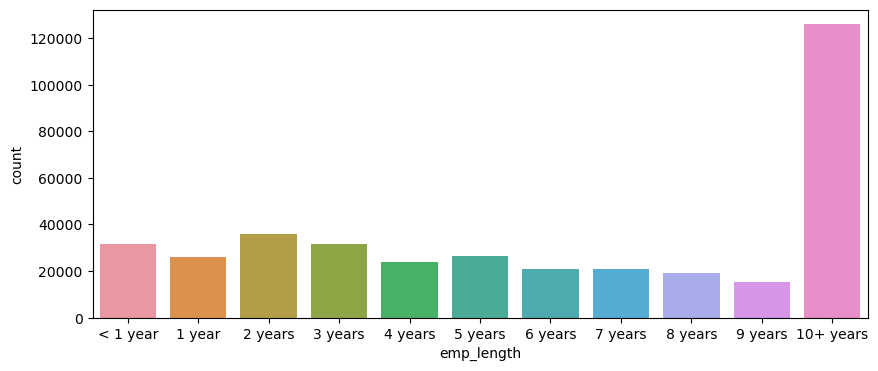

In [37]:
plt.figure(figsize=(10,4))

order = ['< 1 year',
         '1 year',
         '2 years',
         '3 years',
         '4 years',
         '5 years',
         '6 years',
         '7 years',
         '8 years',
         '9 years',
         '10+ years']

sns.countplot(x='emp_length',data=df,order=order)

### Plotting out the countplot with a hue separating Fully Paid vs Charged Off

<Axes: xlabel='emp_length', ylabel='count'>

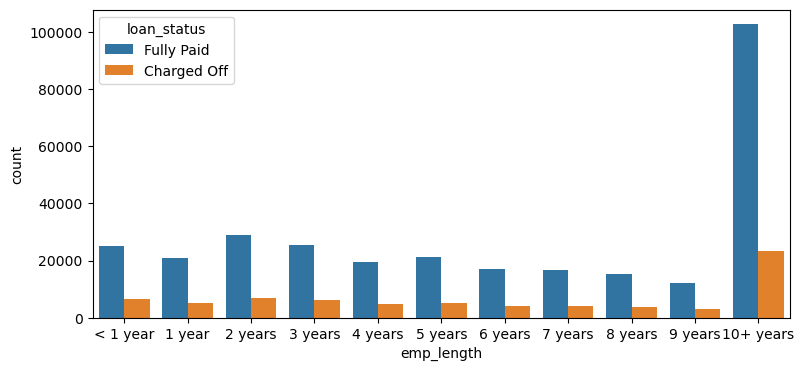

In [38]:
plt.figure(figsize=(9,4))

order = ['< 1 year',
         '1 year',
         '2 years',
         '3 years',
         '4 years',
         '5 years',
         '6 years',
         '7 years',
         '8 years',
         '9 years',
         '10+ years']

sns.countplot(x='emp_length',data=df,order=order, hue='loan_status')

### Finding the percentage of charge offs per category

In [39]:
df[df['loan_status']=='Charged Off']['emp_length'].value_counts()/df['emp_length'].value_counts()*100

1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: emp_length, dtype: float64

In [40]:
grap = df[df['loan_status']=='Charged Off']['emp_length'].value_counts()/df['emp_length'].value_counts()

<Axes: >

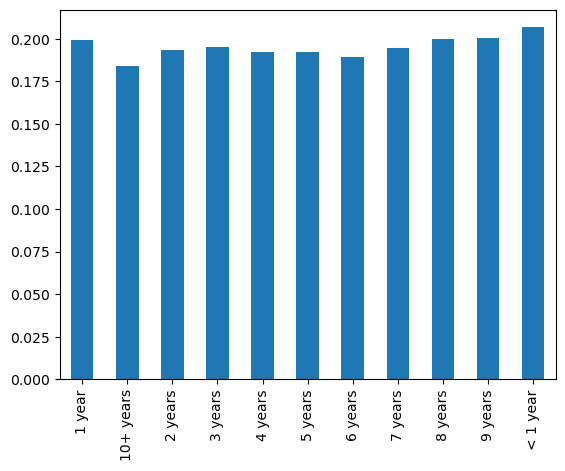

In [41]:
grap.plot(kind='bar')

### Dropping the emp_length column

In [42]:
df.drop('emp_length',axis=1,inplace=True)

In [43]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

### Finding repeated information

In [44]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [45]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [46]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

### Dropping the title column

In [47]:
df.drop('title',axis=1,inplace=True)

### Analyzing mort_acc 

In [48]:
feat_info('mort_acc')

Number of mortgage accounts.


In [49]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

### Searching correlations to mort_acc

In [50]:
df.corr(numeric_only=True)['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

### Getting the mean of the columns that most correlates with mort_acc

In [51]:
df.groupby('total_acc')['mort_acc'].mean()

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

### Filling in the missing mort_acc values based on their total_acc value

In [52]:
ser = df.groupby('total_acc')['mort_acc'].mean()
def troca(x,y):
    
    if np.isnan(y):
        return ser[x]
    else:
        return y
        

In [53]:
df['mort_acc'] = df.apply(lambda x: troca(x['total_acc'],x['mort_acc']),axis=1)

In [54]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

### Removing the rows that are missing those values in those columns

In [55]:
df = df.dropna()

In [56]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### Listing all the columns that are currently non-numeric

In [57]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

### Converting the term feature into integer 

In [58]:
df['term'] = df['term'].apply(lambda x: 36 if x == ' 36 months' else 60)

/var/folders/y5/87l_bvyd22j00dz0tp43z_t80000gn/T/ipykernel_21754/297011362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['term'] = df['term'].apply(lambda x: 36 if x == ' 36 months' else 60)


In [59]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

### Dropping the grade feature

In [60]:
df.drop('grade',axis=1,inplace=True)

/var/folders/y5/87l_bvyd22j00dz0tp43z_t80000gn/T/ipykernel_21754/1772960324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('grade',axis=1,inplace=True)


In [61]:
df

loan_amnt  term  int_rate  installment sub_grade home_ownership  \
0         10000.0    36     11.44       329.48        B4           RENT   
1          8000.0    36     11.99       265.68        B5       MORTGAGE   
2         15600.0    36     10.49       506.97        B3           RENT   
3          7200.0    36      6.49       220.65        A2           RENT   
4         24375.0    60     17.27       609.33        C5       MORTGAGE   
...           ...   ...       ...          ...       ...            ...   
396025    10000.0    60     10.99       217.38        B4           RENT   
396026    21000.0    36     12.29       700.42        C1       MORTGAGE   
396027     5000.0    36      9.99       161.32        B1           RENT   
396028    21000.0    60     15.31       503.02        C2       MORTGAGE   
396029     2000.0    36     13.61        67.98        C2           RENT   

        annual_inc verification_status   issue_d  loan_status  \
0         117000.0        Not Verified  Jan-2015   Fully Paid   
1          65000.0        Not Verified  Jan-2015   Fully Paid   
2          43057.0     Source Verified  Jan-2015   Fully Paid   
3          54000.0        Not Verified  Nov-2014   Fully Paid   
4          55000.0            Verified  Apr-2013  Charged Off   
...            ...                 ...       ...          ...   
396025     40000.0     Source Verified  Oct-2015   Fully Paid   
396026    110000.0     Source Verified  Feb-2015   Fully Paid   
396027     56500.0            Verified  Oct-2013   Fully Paid   
396028     64000.0            Verified  Aug-2012   Fully Paid   
396029     42996.0            Verified  Jun-2010   Fully Paid   

                   purpose    dti earliest_cr_line  open_acc  pub_rec  \
0                 vacation  26.24         Jun-1990      16.0      0.0   
1       debt_consolidation  22.05         Jul-2004      17.0      0.0   
2              credit_card  12.79         Aug-2007      13.0      0.0   
3              credit_card   2.60         Sep-2006       6.0      0.0   
4              credit_card  33.95         Mar-1999      13.0      0.0   
...                    ...    ...              ...       ...      ...   
396025  debt_consolidation  15.63         Nov-2004       6.0      0.0   
396026  debt_consolidation  21.45         Feb-2006       6.0      0.0   
396027  debt_consolidation  17.56         Mar-1997      15.0      0.0   
396028  debt_consolidation  15.88         Nov-1990       9.0      0.0   
396029  debt_consolidation   8.32         Sep-1998       3.0      0.0   

        revol_bal  revol_util  total_acc initial_list_status application_type  \
0         36369.0        41.8       25.0                   w       INDIVIDUAL   
1         20131.0        53.3       27.0                   f       INDIVIDUAL   
2         11987.0        92.2       26.0                   f       INDIVIDUAL   
3          5472.0        21.5       13.0                   f       INDIVIDUAL   
4         24584.0        69.8       43.0                   f       INDIVIDUAL   
...           ...         ...        ...                 ...              ...   
396025     1990.0        34.3       23.0                   w       INDIVIDUAL   
396026    43263.0        95.7        8.0                   f       INDIVIDUAL   
396027    32704.0        66.9       23.0                   f       INDIVIDUAL   
396028    15704.0        53.8       20.0                   f       INDIVIDUAL   
396029     4292.0        91.3       19.0                   f       INDIVIDUAL   

        mort_acc  pub_rec_bankruptcies  \
0       0.000000                   0.0   
1       3.000000                   0.0   
2       0.000000                   0.0   
3       0.000000                   0.0   
4       1.000000                   0.0   
...          ...                   ...   
396025  0.000000                   0.0   
396026  1.000000                   0.0   
396027  0.000000                   0.0   
396028  5.000000                   0.0   
396029  1.3580

### Converting columns to dummy variables and concatenating these new columns to the original dataframe

In [62]:
dum = pd.get_dummies(df['sub_grade'],drop_first=True)

In [63]:
df = pd.concat([df.drop('sub_grade',axis=1),dum],axis=1)

In [64]:
df

loan_amnt  term  int_rate  installment home_ownership  annual_inc  \
0         10000.0    36     11.44       329.48           RENT    117000.0   
1          8000.0    36     11.99       265.68       MORTGAGE     65000.0   
2         15600.0    36     10.49       506.97           RENT     43057.0   
3          7200.0    36      6.49       220.65           RENT     54000.0   
4         24375.0    60     17.27       609.33       MORTGAGE     55000.0   
...           ...   ...       ...          ...            ...         ...   
396025    10000.0    60     10.99       217.38           RENT     40000.0   
396026    21000.0    36     12.29       700.42       MORTGAGE    110000.0   
396027     5000.0    36      9.99       161.32           RENT     56500.0   
396028    21000.0    60     15.31       503.02       MORTGAGE     64000.0   
396029     2000.0    36     13.61        67.98           RENT     42996.0   

       verification_status   issue_d  loan_status             purpose    dti  \
0             Not Verified  Jan-2015   Fully Paid            vacation  26.24   
1             Not Verified  Jan-2015   Fully Paid  debt_consolidation  22.05   
2          Source Verified  Jan-2015   Fully Paid         credit_card  12.79   
3             Not Verified  Nov-2014   Fully Paid         credit_card   2.60   
4                 Verified  Apr-2013  Charged Off         credit_card  33.95   
...                    ...       ...          ...                 ...    ...   
396025     Source Verified  Oct-2015   Fully Paid  debt_consolidation  15.63   
396026     Source Verified  Feb-2015   Fully Paid  debt_consolidation  21.45   
396027            Verified  Oct-2013   Fully Paid  debt_consolidation  17.56   
396028            Verified  Aug-2012   Fully Paid  debt_consolidation  15.88   
396029            Verified  Jun-2010   Fully Paid  debt_consolidation   8.32   

       earliest_cr_line  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0              Jun-1990      16.0      0.0    36369.0        41.8       25.0   
1              Jul-2004      17.0      0.0    20131.0        53.3       27.0   
2              Aug-2007      13.0      0.0    11987.0        92.2       26.0   
3              Sep-2006       6.0      0.0     5472.0        21.5       13.0   
4              Mar-1999      13.0      0.0    24584.0        69.8       43.0   
...                 ...       ...      ...        ...         ...        ...   
396025         Nov-2004       6.0      0.0     1990.0        34.3       23.0   
396026         Feb-2006       6.0      0.0    43263.0        95.7        8.0   
396027         Mar-1997      15.0      0.0    32704.0        66.9       23.0   
396028         Nov-1990       9.0      0.0    15704.0        53.8       20.0   
396029         Sep-1998       3.0      0.0     4292.0        91.3       19.0   

       initial_list_status application_type  mort_acc  pub_rec_bankruptcies  \
0                        w       INDIVIDUAL  0.000000                   0.0   
1                        f       INDIVIDUAL  3.000000                   0.0   
2                        f       INDIVIDUAL  0.000000                   0.0   
3                        f       INDIVIDUAL  0.000000                   0.0   
4                        f       INDIVIDUAL  1.000000                   0.0   
...                    ...              ...       ...                   ...   
396025                   w       INDIVIDUAL  0.000000                   0.0   
396026                   f       INDIVIDUAL  1.000000                   0.0   
396027                   f       INDIVIDUAL  0.000000                   0.0   
396028                   f       INDIVIDUAL  5.000000                   0.0   
396029                   f       INDIVIDUAL  1.358013                   0.0   

                                                  address  loan_repaid  A2  \
0            0174 Michelle Gateway\nMendozaberg, OK 22690            1   0   
1         1076 Carney Fort Apt. 347\nLoganmouth, SD 0511

In [65]:
dum1 = pd.get_dummies(df['verification_status'],drop_first=True)
dum2 = pd.get_dummies(df['application_type'],drop_first=True)
dum3 = pd.get_dummies(df['initial_list_status'],drop_first=True)
dum4 = pd.get_dummies(df['purpose'],drop_first=True)

In [66]:
df = pd.concat([df.drop('verification_status',axis=1),dum1],axis=1)
df = pd.concat([df.drop('application_type',axis=1),dum2],axis=1)
df = pd.concat([df.drop('initial_list_status',axis=1),dum3],axis=1)
df = pd.concat([df.drop('purpose',axis=1),dum4],axis=1)

In [67]:
df

loan_amnt  term  int_rate  installment home_ownership  annual_inc  \
0         10000.0    36     11.44       329.48           RENT    117000.0   
1          8000.0    36     11.99       265.68       MORTGAGE     65000.0   
2         15600.0    36     10.49       506.97           RENT     43057.0   
3          7200.0    36      6.49       220.65           RENT     54000.0   
4         24375.0    60     17.27       609.33       MORTGAGE     55000.0   
...           ...   ...       ...          ...            ...         ...   
396025    10000.0    60     10.99       217.38           RENT     40000.0   
396026    21000.0    36     12.29       700.42       MORTGAGE    110000.0   
396027     5000.0    36      9.99       161.32           RENT     56500.0   
396028    21000.0    60     15.31       503.02       MORTGAGE     64000.0   
396029     2000.0    36     13.61        67.98           RENT     42996.0   

         issue_d  loan_status    dti earliest_cr_line  open_acc  pub_rec  \
0       Jan-2015   Fully Paid  26.24         Jun-1990      16.0      0.0   
1       Jan-2015   Fully Paid  22.05         Jul-2004      17.0      0.0   
2       Jan-2015   Fully Paid  12.79         Aug-2007      13.0      0.0   
3       Nov-2014   Fully Paid   2.60         Sep-2006       6.0      0.0   
4       Apr-2013  Charged Off  33.95         Mar-1999      13.0      0.0   
...          ...          ...    ...              ...       ...      ...   
396025  Oct-2015   Fully Paid  15.63         Nov-2004       6.0      0.0   
396026  Feb-2015   Fully Paid  21.45         Feb-2006       6.0      0.0   
396027  Oct-2013   Fully Paid  17.56         Mar-1997      15.0      0.0   
396028  Aug-2012   Fully Paid  15.88         Nov-1990       9.0      0.0   
396029  Jun-2010   Fully Paid   8.32         Sep-1998       3.0      0.0   

        revol_bal  revol_util  total_acc  mort_acc  pub_rec_bankruptcies  \
0         36369.0        41.8       25.0  0.000000                   0.0   
1         20131.0        53.3       27.0  3.000000                   0.0   
2         11987.0        92.2       26.0  0.000000                   0.0   
3          5472.0        21.5       13.0  0.000000                   0.0   
4         24584.0        69.8       43.0  1.000000                   0.0   
...           ...         ...        ...       ...                   ...   
396025     1990.0        34.3       23.0  0.000000                   0.0   
396026    43263.0        95.7        8.0  1.000000                   0.0   
396027    32704.0        66.9       23.0  0.000000                   0.0   
396028    15704.0        53.8       20.0  5.000000                   0.0   
396029     4292.0        91.3       19.0  1.358013                   0.0   

                                                  address  loan_repaid  A2  \
0            0174 Michelle Gateway\nMendozaberg, OK 22690            1   0   
1         1076 Carney Fort Apt. 347\nLoganmouth, SD 05113            1   0   
2         87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113            1   0   
3                   823 Reid Ford\nDelacruzside, MA 00813            1   1   
4                    679 Luna Roads\nGreggshire, VA 11650            0   0   
...                                                   ...          ...  ..   
396025     12951 Williams Crossing\nJohnnyville, DC 30723            1   0   
396026  0114 Fowler Field Suite 028\nRachelborough, LA...            1   0   
396027   953 Matthew Points Suite 414\nReedfort, NY 70466            1   0   
396028  7843 Blake Freeway Apt. 229\nNew Michael, FL 2...            1   0   
396029        787 Michelle Causeway\nBriannaton, AR 48052            1   0   

        A3  A4  A5  B1  B2  B3  B4  B5  C1  C2  C3  C4  C5  D1  D2  D3  D4  \
0        0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
1        0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   
2        0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
3       

In [68]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [69]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if x=='ANY' else('OTHER' if x=='NONE' else x))

In [70]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [71]:
dumm1 = pd.get_dummies(df['home_ownership'],drop_first=True)

In [72]:
df = pd.concat([df.drop('home_ownership',axis=1),dumm1],axis=1)

In [73]:
df

loan_amnt  term  int_rate  installment  annual_inc   issue_d  \
0         10000.0    36     11.44       329.48    117000.0  Jan-2015   
1          8000.0    36     11.99       265.68     65000.0  Jan-2015   
2         15600.0    36     10.49       506.97     43057.0  Jan-2015   
3          7200.0    36      6.49       220.65     54000.0  Nov-2014   
4         24375.0    60     17.27       609.33     55000.0  Apr-2013   
...           ...   ...       ...          ...         ...       ...   
396025    10000.0    60     10.99       217.38     40000.0  Oct-2015   
396026    21000.0    36     12.29       700.42    110000.0  Feb-2015   
396027     5000.0    36      9.99       161.32     56500.0  Oct-2013   
396028    21000.0    60     15.31       503.02     64000.0  Aug-2012   
396029     2000.0    36     13.61        67.98     42996.0  Jun-2010   

        loan_status    dti earliest_cr_line  open_acc  pub_rec  revol_bal  \
0        Fully Paid  26.24         Jun-1990      16.0      0.0    36369.0   
1        Fully Paid  22.05         Jul-2004      17.0      0.0    20131.0   
2        Fully Paid  12.79         Aug-2007      13.0      0.0    11987.0   
3        Fully Paid   2.60         Sep-2006       6.0      0.0     5472.0   
4       Charged Off  33.95         Mar-1999      13.0      0.0    24584.0   
...             ...    ...              ...       ...      ...        ...   
396025   Fully Paid  15.63         Nov-2004       6.0      0.0     1990.0   
396026   Fully Paid  21.45         Feb-2006       6.0      0.0    43263.0   
396027   Fully Paid  17.56         Mar-1997      15.0      0.0    32704.0   
396028   Fully Paid  15.88         Nov-1990       9.0      0.0    15704.0   
396029   Fully Paid   8.32         Sep-1998       3.0      0.0     4292.0   

        revol_util  total_acc  mort_acc  pub_rec_bankruptcies  \
0             41.8       25.0  0.000000                   0.0   
1             53.3       27.0  3.000000                   0.0   
2             92.2       26.0  0.000000                   0.0   
3             21.5       13.0  0.000000                   0.0   
4             69.8       43.0  1.000000                   0.0   
...            ...        ...       ...                   ...   
396025        34.3       23.0  0.000000                   0.0   
396026        95.7        8.0  1.000000                   0.0   
396027        66.9       23.0  0.000000                   0.0   
396028        53.8       20.0  5.000000                   0.0   
396029        91.3       19.0  1.358013                   0.0   

                                                  address  loan_repaid  A2  \
0            0174 Michelle Gateway\nMendozaberg, OK 22690            1   0   
1         1076 Carney Fort Apt. 347\nLoganmouth, SD 05113            1   0   
2         87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113            1   0   
3                   823 Reid Ford\nDelacruzside, MA 00813            1   1   
4                    679 Luna Roads\nGreggshire, VA 11650            0   0   
...                                                   ...          ...  ..   
396025     12951 Williams Crossing\nJohnnyville, DC 30723            1   0   
396026  0114 Fowler Field Suite 028\nRachelborough, LA...            1   0   
396027   953 Matthew Points Suite 414\nReedfort, NY 70466            1   0   
396028  7843 Blake Freeway Apt. 229\nNew Michael, FL 2...            1   0   
396029        787 Michelle Causeway\nBriannaton, AR 48052            1   0   

        A3  A4  A5  B1  B2  B3  B4  B5  C1  C2  C3  C4  C5  D1  D2  D3  D4  \
0        0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
1        0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   
2        0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
3        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4        0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
...     ..  ..  ..  ..  ..  ..  

In [74]:
df['zip_code'] = df['address'].apply(lambda x: x[-5:])

In [75]:
dumm = pd.get_dummies(df['zip_code'],drop_first=True)

In [76]:
df = pd.concat([df.drop(['zip_code','address'],axis=1),dumm],axis=1)

In [77]:
df

loan_amnt  term  int_rate  installment  annual_inc   issue_d  \
0         10000.0    36     11.44       329.48    117000.0  Jan-2015   
1          8000.0    36     11.99       265.68     65000.0  Jan-2015   
2         15600.0    36     10.49       506.97     43057.0  Jan-2015   
3          7200.0    36      6.49       220.65     54000.0  Nov-2014   
4         24375.0    60     17.27       609.33     55000.0  Apr-2013   
...           ...   ...       ...          ...         ...       ...   
396025    10000.0    60     10.99       217.38     40000.0  Oct-2015   
396026    21000.0    36     12.29       700.42    110000.0  Feb-2015   
396027     5000.0    36      9.99       161.32     56500.0  Oct-2013   
396028    21000.0    60     15.31       503.02     64000.0  Aug-2012   
396029     2000.0    36     13.61        67.98     42996.0  Jun-2010   

        loan_status    dti earliest_cr_line  open_acc  pub_rec  revol_bal  \
0        Fully Paid  26.24         Jun-1990      16.0      0.0    36369.0   
1        Fully Paid  22.05         Jul-2004      17.0      0.0    20131.0   
2        Fully Paid  12.79         Aug-2007      13.0      0.0    11987.0   
3        Fully Paid   2.60         Sep-2006       6.0      0.0     5472.0   
4       Charged Off  33.95         Mar-1999      13.0      0.0    24584.0   
...             ...    ...              ...       ...      ...        ...   
396025   Fully Paid  15.63         Nov-2004       6.0      0.0     1990.0   
396026   Fully Paid  21.45         Feb-2006       6.0      0.0    43263.0   
396027   Fully Paid  17.56         Mar-1997      15.0      0.0    32704.0   
396028   Fully Paid  15.88         Nov-1990       9.0      0.0    15704.0   
396029   Fully Paid   8.32         Sep-1998       3.0      0.0     4292.0   

        revol_util  total_acc  mort_acc  pub_rec_bankruptcies  loan_repaid  \
0             41.8       25.0  0.000000                   0.0            1   
1             53.3       27.0  3.000000                   0.0            1   
2             92.2       26.0  0.000000                   0.0            1   
3             21.5       13.0  0.000000                   0.0            1   
4             69.8       43.0  1.000000                   0.0            0   
...            ...        ...       ...                   ...          ...   
396025        34.3       23.0  0.000000                   0.0            1   
396026        95.7        8.0  1.000000                   0.0            1   
396027        66.9       23.0  0.000000                   0.0            1   
396028        53.8       20.0  5.000000                   0.0            1   
396029        91.3       19.0  1.358013                   0.0            1   

        A2  A3  A4  A5  B1  B2  B3  B4  B5  C1  C2  C3  C4  C5  D1  D2  D3  \
0        0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   
1        0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
2        0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
3        1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4        0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
396025   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   
396026   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
396027   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   
396028   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
396029   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   

        D4  D5  E1  E2  E3  E4  E5  F1  F2  F3  F4  F5  G1  G2  G3  G4  G5  \
0        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3        0   0   0   0   0   0  

In [78]:
df.drop('issue_d',axis=1,inplace=True)

In [79]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: x[-4:])

In [80]:
df

loan_amnt  term  int_rate  installment  annual_inc  loan_status  \
0         10000.0    36     11.44       329.48    117000.0   Fully Paid   
1          8000.0    36     11.99       265.68     65000.0   Fully Paid   
2         15600.0    36     10.49       506.97     43057.0   Fully Paid   
3          7200.0    36      6.49       220.65     54000.0   Fully Paid   
4         24375.0    60     17.27       609.33     55000.0  Charged Off   
...           ...   ...       ...          ...         ...          ...   
396025    10000.0    60     10.99       217.38     40000.0   Fully Paid   
396026    21000.0    36     12.29       700.42    110000.0   Fully Paid   
396027     5000.0    36      9.99       161.32     56500.0   Fully Paid   
396028    21000.0    60     15.31       503.02     64000.0   Fully Paid   
396029     2000.0    36     13.61        67.98     42996.0   Fully Paid   

          dti earliest_cr_line  open_acc  pub_rec  revol_bal  revol_util  \
0       26.24         Jun-1990      16.0      0.0    36369.0        41.8   
1       22.05         Jul-2004      17.0      0.0    20131.0        53.3   
2       12.79         Aug-2007      13.0      0.0    11987.0        92.2   
3        2.60         Sep-2006       6.0      0.0     5472.0        21.5   
4       33.95         Mar-1999      13.0      0.0    24584.0        69.8   
...       ...              ...       ...      ...        ...         ...   
396025  15.63         Nov-2004       6.0      0.0     1990.0        34.3   
396026  21.45         Feb-2006       6.0      0.0    43263.0        95.7   
396027  17.56         Mar-1997      15.0      0.0    32704.0        66.9   
396028  15.88         Nov-1990       9.0      0.0    15704.0        53.8   
396029   8.32         Sep-1998       3.0      0.0     4292.0        91.3   

        total_acc  mort_acc  pub_rec_bankruptcies  loan_repaid  A2  A3  A4  \
0            25.0  0.000000                   0.0            1   0   0   0   
1            27.0  3.000000                   0.0            1   0   0   0   
2            26.0  0.000000                   0.0            1   0   0   0   
3            13.0  0.000000                   0.0            1   1   0   0   
4            43.0  1.000000                   0.0            0   0   0   0   
...           ...       ...                   ...          ...  ..  ..  ..   
396025       23.0  0.000000                   0.0            1   0   0   0   
396026        8.0  1.000000                   0.0            1   0   0   0   
396027       23.0  0.000000                   0.0            1   0   0   0   
396028       20.0  5.000000                   0.0            1   0   0   0   
396029       19.0  1.358013                   0.0            1   0   0   0   

        A5  B1  B2  B3  B4  B5  C1  C2  C3  C4  C5  D1  D2  D3  D4  D5  E1  \
0        0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   
1        0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
2        0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   
3        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4        0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
396025   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   
396026   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
396027   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
396028   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   
396029   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   

        E2  E3  E4  E5  F1  F2  F3  F4  F5  G1  G2  G3  G4  G5  \
0        0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1        0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2        0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3        0   0   0   0   0   0   0   0   0   0   0   0  

In [81]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [82]:
df

loan_amnt  term  int_rate  installment  annual_inc  loan_status  \
0         10000.0    36     11.44       329.48    117000.0   Fully Paid   
1          8000.0    36     11.99       265.68     65000.0   Fully Paid   
2         15600.0    36     10.49       506.97     43057.0   Fully Paid   
3          7200.0    36      6.49       220.65     54000.0   Fully Paid   
4         24375.0    60     17.27       609.33     55000.0  Charged Off   
...           ...   ...       ...          ...         ...          ...   
396025    10000.0    60     10.99       217.38     40000.0   Fully Paid   
396026    21000.0    36     12.29       700.42    110000.0   Fully Paid   
396027     5000.0    36      9.99       161.32     56500.0   Fully Paid   
396028    21000.0    60     15.31       503.02     64000.0   Fully Paid   
396029     2000.0    36     13.61        67.98     42996.0   Fully Paid   

          dti  open_acc  pub_rec  revol_bal  revol_util  total_acc  mort_acc  \
0       26.24      16.0      0.0    36369.0        41.8       25.0  0.000000   
1       22.05      17.0      0.0    20131.0        53.3       27.0  3.000000   
2       12.79      13.0      0.0    11987.0        92.2       26.0  0.000000   
3        2.60       6.0      0.0     5472.0        21.5       13.0  0.000000   
4       33.95      13.0      0.0    24584.0        69.8       43.0  1.000000   
...       ...       ...      ...        ...         ...        ...       ...   
396025  15.63       6.0      0.0     1990.0        34.3       23.0  0.000000   
396026  21.45       6.0      0.0    43263.0        95.7        8.0  1.000000   
396027  17.56      15.0      0.0    32704.0        66.9       23.0  0.000000   
396028  15.88       9.0      0.0    15704.0        53.8       20.0  5.000000   
396029   8.32       3.0      0.0     4292.0        91.3       19.0  1.358013   

        pub_rec_bankruptcies  loan_repaid  A2  A3  A4  A5  B1  B2  B3  B4  B5  \
0                        0.0            1   0   0   0   0   0   0   0   1   0   
1                        0.0            1   0   0   0   0   0   0   0   0   1   
2                        0.0            1   0   0   0   0   0   0   1   0   0   
3                        0.0            1   1   0   0   0   0   0   0   0   0   
4                        0.0            0   0   0   0   0   0   0   0   0   0   
...                      ...          ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
396025                   0.0            1   0   0   0   0   0   0   0   1   0   
396026                   0.0            1   0   0   0   0   0   0   0   0   0   
396027                   0.0            1   0   0   0   0   1   0   0   0   0   
396028                   0.0            1   0   0   0   0   0   0   0   0   0   
396029                   0.0            1   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C4  C5  D1  D2  D3  D4  D5  E1  E2  E3  E4  E5  F1  F2  \
0        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4        0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
396025   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
396026   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
396027   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
396028   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
396029   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        F3  F4  F5  G1  G2  G3  G4  G5  Source Verified  Verified  INDIVIDUAL  \
0        0   0   0   0   0   0   0   0                0         0           1   
1        0   0   0   0   0   0   0   0                0         0         

In [83]:
df['earliest_cr_year'] = df['earliest_cr_year'].apply(lambda x: int(x))

In [84]:
df['earliest_cr_year'][0]

1990

In [85]:
df.drop('loan_status',axis=1,inplace=True)

### Train Test Split

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
df

loan_amnt  term  int_rate  installment  annual_inc    dti  open_acc  \
0         10000.0    36     11.44       329.48    117000.0  26.24      16.0   
1          8000.0    36     11.99       265.68     65000.0  22.05      17.0   
2         15600.0    36     10.49       506.97     43057.0  12.79      13.0   
3          7200.0    36      6.49       220.65     54000.0   2.60       6.0   
4         24375.0    60     17.27       609.33     55000.0  33.95      13.0   
...           ...   ...       ...          ...         ...    ...       ...   
396025    10000.0    60     10.99       217.38     40000.0  15.63       6.0   
396026    21000.0    36     12.29       700.42    110000.0  21.45       6.0   
396027     5000.0    36      9.99       161.32     56500.0  17.56      15.0   
396028    21000.0    60     15.31       503.02     64000.0  15.88       9.0   
396029     2000.0    36     13.61        67.98     42996.0   8.32       3.0   

        pub_rec  revol_bal  revol_util  total_acc  mort_acc  \
0           0.0    36369.0        41.8       25.0  0.000000   
1           0.0    20131.0        53.3       27.0  3.000000   
2           0.0    11987.0        92.2       26.0  0.000000   
3           0.0     5472.0        21.5       13.0  0.000000   
4           0.0    24584.0        69.8       43.0  1.000000   
...         ...        ...         ...        ...       ...   
396025      0.0     1990.0        34.3       23.0  0.000000   
396026      0.0    43263.0        95.7        8.0  1.000000   
396027      0.0    32704.0        66.9       23.0  0.000000   
396028      0.0    15704.0        53.8       20.0  5.000000   
396029      0.0     4292.0        91.3       19.0  1.358013   

        pub_rec_bankruptcies  loan_repaid  A2  A3  A4  A5  B1  B2  B3  B4  B5  \
0                        0.0            1   0   0   0   0   0   0   0   1   0   
1                        0.0            1   0   0   0   0   0   0   0   0   1   
2                        0.0            1   0   0   0   0   0   0   1   0   0   
3                        0.0            1   1   0   0   0   0   0   0   0   0   
4                        0.0            0   0   0   0   0   0   0   0   0   0   
...                      ...          ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
396025                   0.0            1   0   0   0   0   0   0   0   1   0   
396026                   0.0            1   0   0   0   0   0   0   0   0   0   
396027                   0.0            1   0   0   0   0   1   0   0   0   0   
396028                   0.0            1   0   0   0   0   0   0   0   0   0   
396029                   0.0            1   0   0   0   0   0   0   0   0   0   

        C1  C2  C3  C4  C5  D1  D2  D3  D4  D5  E1  E2  E3  E4  E5  F1  F2  \
0        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4        0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
396025   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
396026   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
396027   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
396028   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
396029   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        F3  F4  F5  G1  G2  G3  G4  G5  Source Verified  Verified  INDIVIDUAL  \
0        0   0   0   0   0   0   0   0                0         0           1   
1        0   0   0   0   0   0   0   0                0         0           1   
2        0   0   0   0   0   0   0   0                1         0           1   
3        0   0   0   0   0   0   0   0                0         0   

In [88]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Grabbing a Sample for Training Time

In [90]:
df = df.sample(frac=0.1,random_state=101)
print(len(df))

39522


### Normalizing the Data

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()

In [93]:
df

loan_amnt  term  int_rate  installment  annual_inc    dti  open_acc  \
204901    14800.0    36     18.49       538.71    104540.0  13.12      10.0   
226870    31000.0    60     17.57       779.97    122000.0  27.46      20.0   
241733    22000.0    60      7.89       444.93     71400.0  21.29       9.0   
225481    20000.0    36     10.78       652.70    100000.0  17.86      14.0   
104657    18625.0    60     17.57       468.61     41500.0  18.80      20.0   
...           ...   ...       ...          ...         ...    ...       ...   
325989    24000.0    36      6.97       740.73    180000.0   2.65      10.0   
123186    12800.0    36     14.47       440.41     62000.0  20.54      10.0   
33157     16200.0    60     20.75       435.99     45000.0  26.51      19.0   
232425    21000.0    60     20.99       568.01     98000.0  17.63      14.0   
160674     5600.0    36     10.64       182.39     65000.0   9.16       7.0   

        pub_rec  revol_bal  revol_util  total_acc  mort_acc  \
204901      0.0    21241.0        60.9       15.0  0.000000   
226870      0.0    36941.0        55.1       36.0  4.000000   
241733      0.0     5212.0        41.7       16.0  0.000000   
225481      0.0    11139.0        38.9       27.0  4.000000   
104657      0.0    27975.0        38.9       41.0  6.000000   
...         ...        ...         ...        ...       ...   
325989      0.0     4604.0         8.5       29.0  5.000000   
123186      0.0    16704.0        91.3       21.0  2.000000   
33157       1.0     9410.0        57.7       23.0  2.000000   
232425      0.0    34456.0        83.4       26.0  1.987414   
160674      0.0    12931.0        72.6       15.0  0.000000   

        pub_rec_bankruptcies  loan_repaid  A2  A3  A4  A5  B1  B2  B3  B4  B5  \
204901                   0.0            1   0   0   0   0   0   0   0   0   0   
226870                   0.0            1   0   0   0   0   0   0   0   0   0   
241733                   0.0            1   0   0   0   1   0   0   0   0   0   
225481                   0.0            0   0   0   0   0   0   0   0   1   0   
104657                   0.0            1   0   0   0   0   0   0   0   0   0   
...                      ...          ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
325989                   0.0            1   1   0   0   0   0   0   0   0   0   
123186                   0.0            1   0   0   0   0   0   0   0   0   0   
33157                    1.0            0   0   0   0   0   0   0   0   0   0   
232425                   0.0            1   0   0   0   0   0   0   0   0   0   
160674                   0.0            1   0   0   0   0   0   1   0   0   0   

        C1  C2  C3  C4  C5  D1  D2  D3  D4  D5  E1  E2  E3  E4  E5  F1  F2  \
204901   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
226870   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
241733   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
225481   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
104657   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
325989   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
123186   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
33157    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   
232425   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
160674   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        F3  F4  F5  G1  G2  G3  G4  G5  Source Verified  Verified  INDIVIDUAL  \
204901   0   0   0   0   0   0   0   0                0         1           1   
226870   0   0   0   0   0   0   0   0                0         1           1   
241733   0   0   0   0   0   0   0   0                1         0           1   
225481   0   0   0   0   0   0   0   0                1         0   

In [94]:
X_train = scaler.fit_transform(X_train)

In [95]:
X_test = scaler.fit_transform(X_test)

### Creating a early stop

In [96]:
from tensorflow.keras.callbacks import EarlyStopping

2023-06-24 13:24:04.817533: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [97]:
#early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

### Creating the Model

In [98]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [99]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

2023-06-24 13:24:11.095737: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Fitting the model to the training data

In [100]:
model.fit(X_train, y_train, batch_size=256, epochs=25, validation_data=(X_test,y_test))#,callbacks=[early_stop])

Epoch 1/25
1236/1236 [==============================] - 6s 4ms/step - loss: 0.2957 - val_loss: 0.2671
Epoch 2/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2647 - val_loss: 0.2686
Epoch 3/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2626 - val_loss: 0.2720
Epoch 4/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2617 - val_loss: 0.2769
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2608 - val_loss: 0.2773
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2601 - val_loss: 0.2796
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2599 - val_loss: 0.2770
Epoch 8/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2594 - val_loss: 0.2779
Epoch 9/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2591 - val_loss: 0.2872
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.258

### Saving the model

In [101]:
from tensorflow.keras.models import load_model

In [102]:
model.save('full_data_project_model.h5')

### Evaluating Model Performance

In [103]:
losses = pd.DataFrame(model.history.history)

<Axes: >

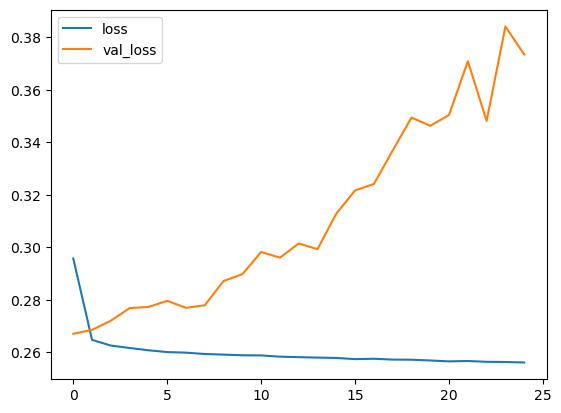

In [104]:
losses[['loss','val_loss']].plot()

### Creating predictions from the X_test set and display a classification report and confusion matrix

In [105]:
from sklearn.metrics import classification_report,confusion_matrix

In [106]:
pred = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 4s 2ms/step


In [107]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.49      0.74      0.59     15658
           1       0.93      0.81      0.86     63386

    accuracy                           0.80     79044
   macro avg       0.71      0.77      0.73     79044
weighted avg       0.84      0.80      0.81     79044



In [108]:
confusion_matrix(y_test,pred)

array([[11519,  4139],
       [12051, 51335]])

### Would you offer this person a loan?

In [109]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   36.00
int_rate                7.90
installment           782.26
annual_inc          62000.00
                      ...   
48052                   0.00
70466                   1.00
86630                   0.00
93700                   0.00
earliest_cr_year     1991.00
Name: 385487, Length: 78, dtype: float64

In [110]:
(model.predict(new_customer.values.reshape(1,78)) > 0.5).astype("int32")



1/1 [==============================] - 0s 45ms/step


array([[1]], dtype=int32)

### Checking if this person actually end up paying back their loan

In [111]:
df.iloc[random_ind]['loan_repaid']

1.0